In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [10]:
df['TotalCharges'].fillna(0, inplace=True)

/tmp/ipython-input-171940771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [11]:
df.drop(columns=['customerID'], inplace=True)

In [12]:
print("Missing values after cleaning:")
print(df.isnull().sum().sum())

Missing values after cleaning:
0


In [13]:
##Summary so far:
##Identified that TotalCharges was wrongly classified as text.
##Converted it to numbers and handled the errors.
##Removed customerID to declutter the dataset.

In [14]:
sns.set_style('whitegrid')

In [18]:
##Baseline

/tmp/ipython-input-3557541388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


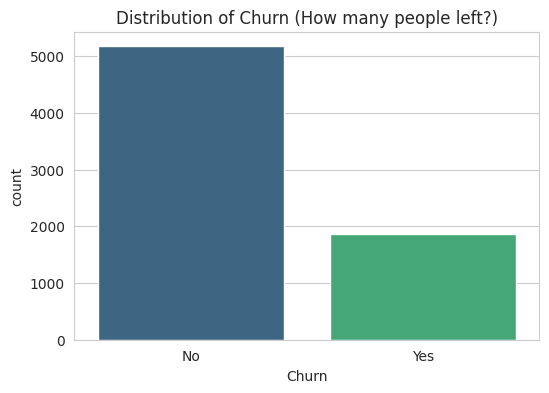

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn (How many people left?)')
plt.show()

In [20]:
##Contract

In [21]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate:\n{churn_rate}")

Churn Rate:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


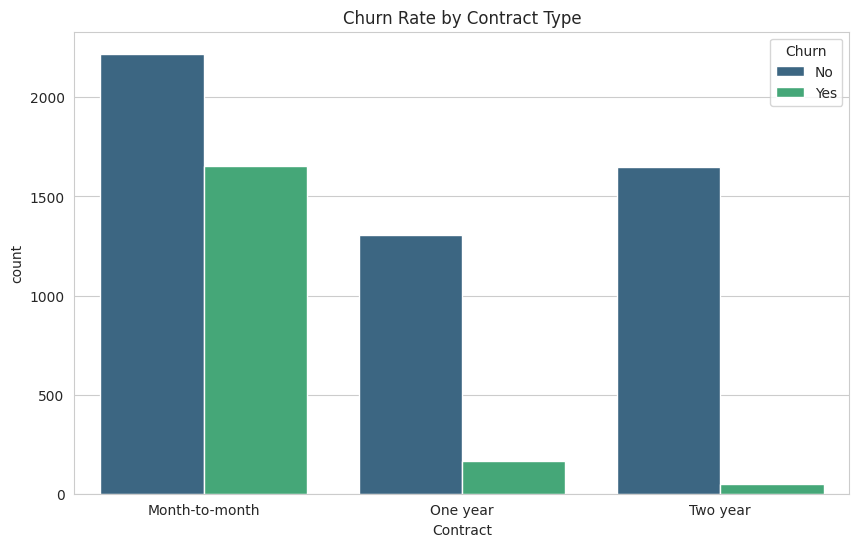

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.show()

In [22]:
##Money Factor

/tmp/ipython-input-3290089142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')


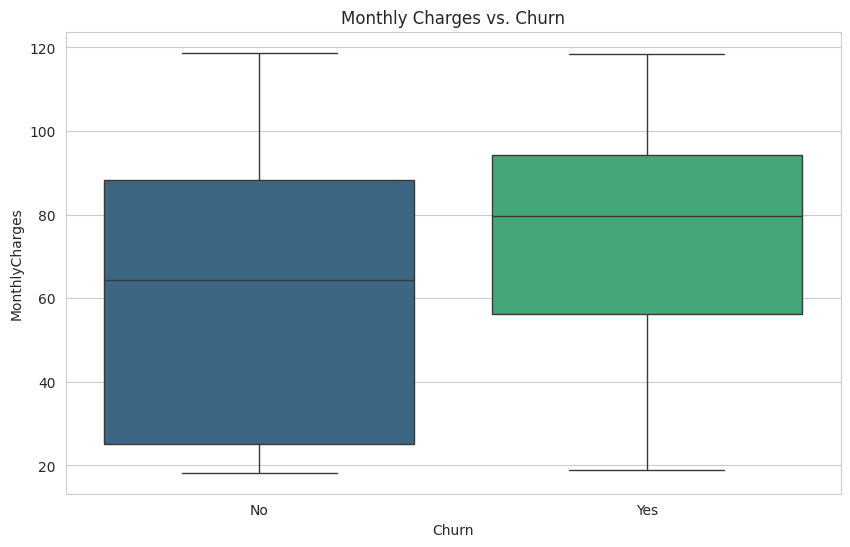

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')
plt.title('Monthly Charges vs. Churn')
plt.show()

In [24]:
##ConvertING categorical variables (Text) into numerical variables.

In [25]:
##1. Convert the target variable 'Churn' to numbers manually
##This ensures we know exactly what 1 means (1 = Customer Left)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [26]:
##2. Convert all other categorical variables into numbers (Dummy Variables)
##drop_first=True avoids redundancy (e.g., if you know it's not Male, it must be Female)
df_dummies = pd.get_dummies(df, drop_first=True)

In [27]:
print(f"Original features: {df.shape[1]}")
print(f"New features after encoding: {df_dummies.shape[1]}")

Original features: 20
New features after encoding: 31


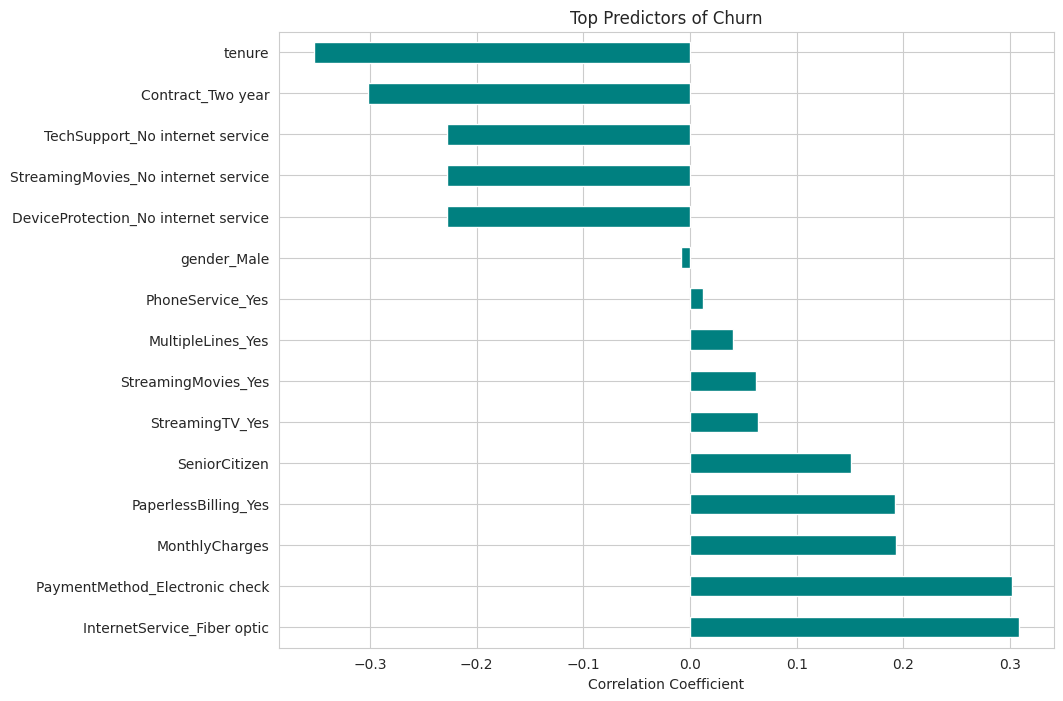

InternetService_Fiber optic             0.308020
PaymentMethod_Electronic check          0.301919
MonthlyCharges                          0.193356
PaperlessBilling_Yes                    0.191825
SeniorCitizen                           0.150889
StreamingTV_Yes                         0.063228
StreamingMovies_Yes                     0.061382
MultipleLines_Yes                       0.040102
PhoneService_Yes                        0.011942
gender_Male                            -0.008612
DeviceProtection_No internet service   -0.227890
StreamingMovies_No internet service    -0.227890
TechSupport_No internet service        -0.227890
Contract_Two year                      -0.302253
tenure                                 -0.352229
Name: Churn, dtype: float64


In [30]:
plt.figure(figsize=(10,8))
corr = df_dummies.corr()['Churn'].sort_values(ascending=False)
corr = corr.drop('Churn')
top_corr = pd.concat([corr.head(10), corr.tail(5)])

top_corr.plot(kind='barh', color='teal')
plt.title('Top Predictors of Churn')
plt.xlabel('Correlation Coefficient')
plt.show()

print(top_corr)

In [31]:
##Interpreting the Results:
##High Positive Correlation (The "Killers"): They are highly likely to leave.
##High Negative Correlation (The "Keepers"): Less likely they are to leave.